<a href="https://colab.research.google.com/github/manuel222-design/manuel222-design/blob/main/Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the dataset
data = pd.read_csv("/content/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# this column is not at all relevent according the info on the dataset
data.drop('duration', axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.count()

,0
age,45211
job,45211
marital,45211
education,45211
default,45211
balance,45211
housing,45211
loan,45211
contact,45211
day,45211


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [ ]:
for col in data.select_dtypes(include='int').columns:
    print(col)
    print(data[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
balance
[ 2143    29     2 ...  8205 14204 16353]
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  

In [ ]:
# lets clean up the data a bit

In [ ]:
# dropping unknowns & other
df = data[~data.isin(['unknown']).any(axis=1)]

In [ ]:
df= data.drop('duration', axis=1)

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [ ]:
# lets explore the categorical columns in the data
cat_features = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# here we can see the features and the number of categories per feature
for feature in cat_features:
    print('Feature {} | Category Numbers {}'.format(feature, len(df[feature].unique())))

Feature job | Category Numbers 12
Feature marital | Category Numbers 3
Feature education | Category Numbers 4
Feature default | Category Numbers 2
Feature housing | Category Numbers 2
Feature loan | Category Numbers 2
Feature contact | Category Numbers 3
Feature month | Category Numbers 12
Feature poutcome | Category Numbers 4
Feature Target | Category Numbers 2


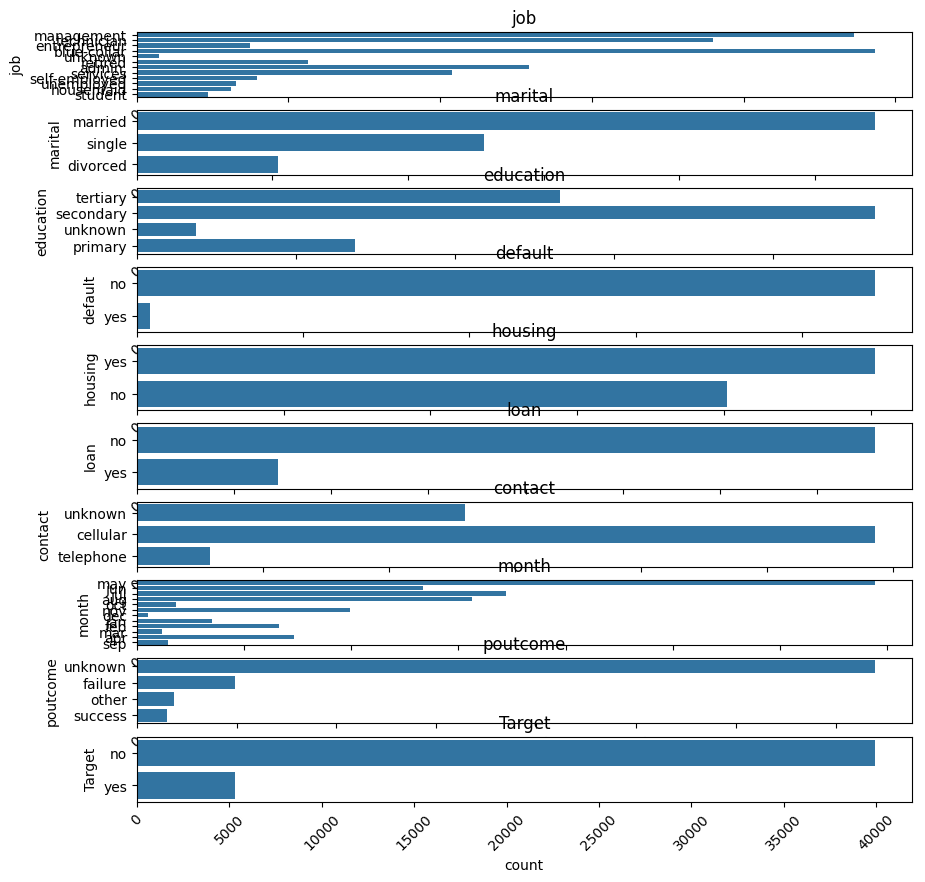

In [ ]:
# lets explore the distribution of catagorical features
plt.figure(figsize=(10, 10))
plotnumber = 1
for i, feature in enumerate(cat_features):
    plt.subplot(len(cat_features), 1, i+1)
    sns.countplot(y=feature, data=df)
    plt.title(feature)
    plt.xticks(rotation=45)
    plotnumber =+1
plt.tight_layout(h_pad=5, w_pad=5)
plt.show()

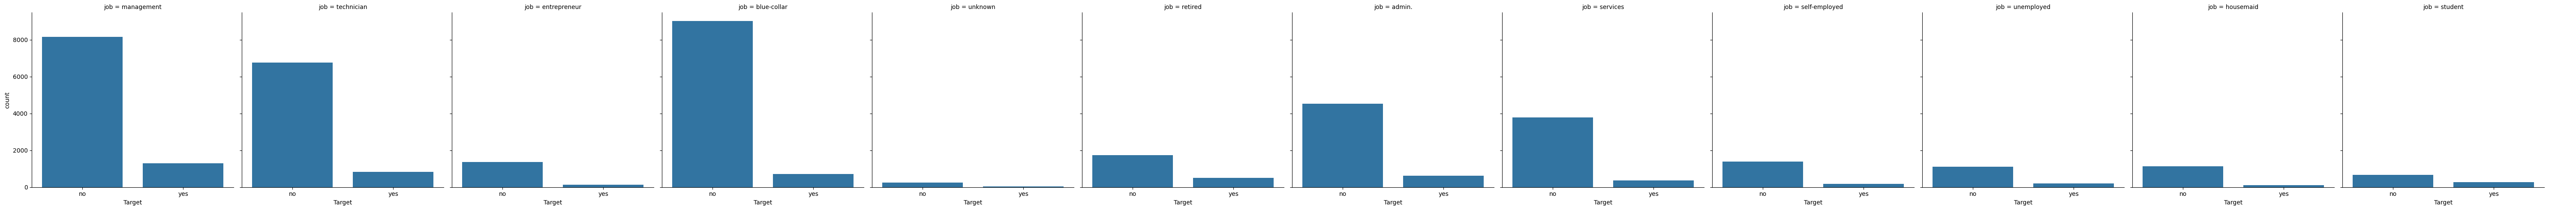

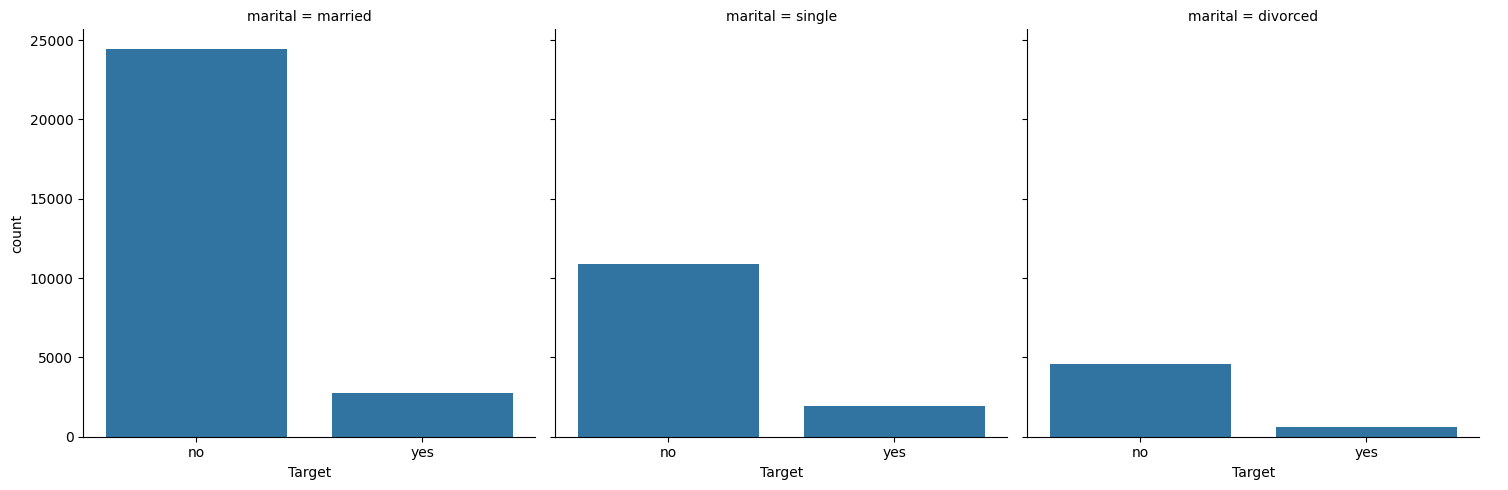

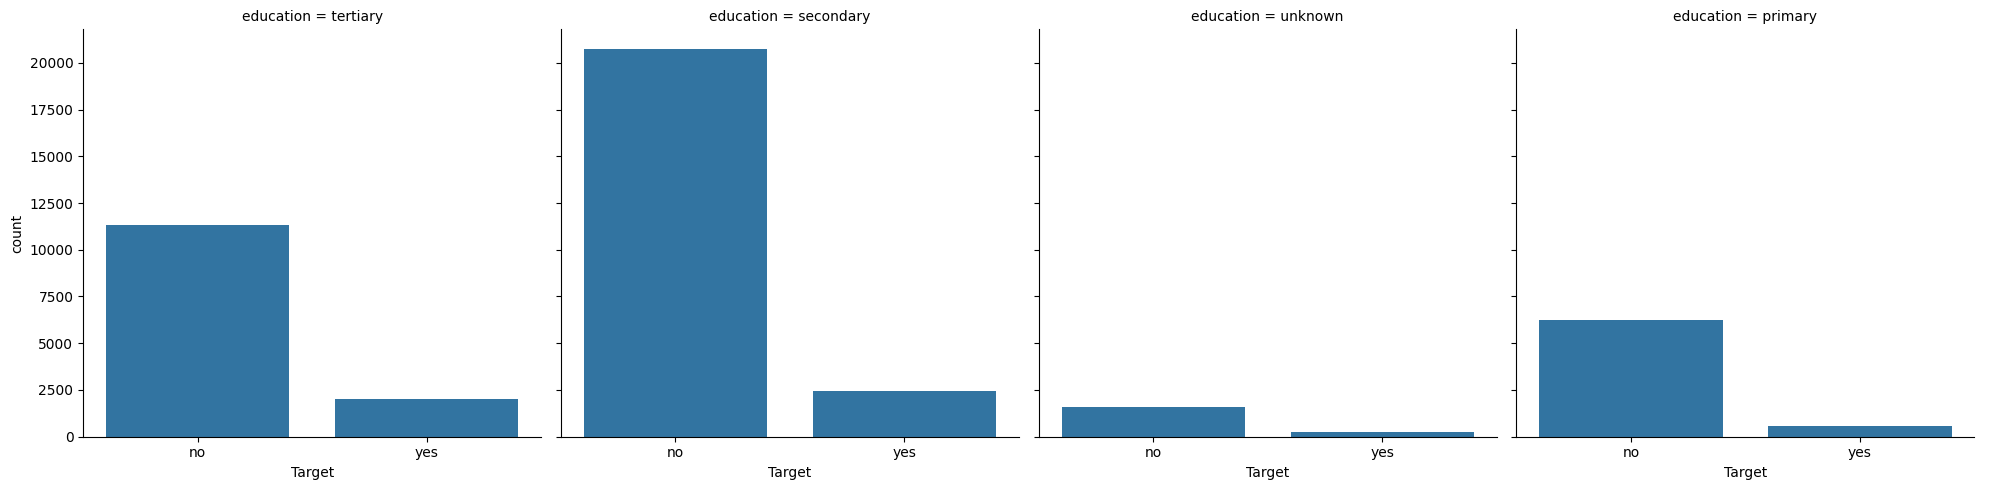

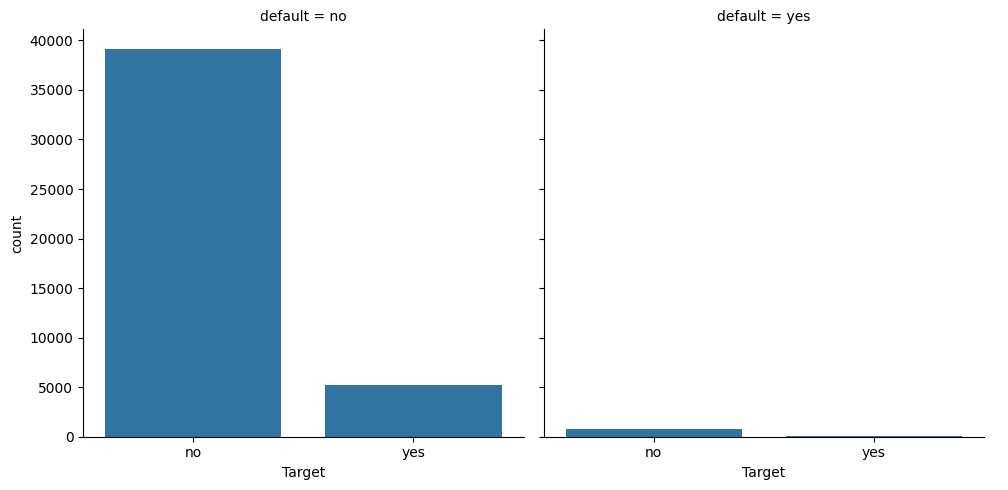

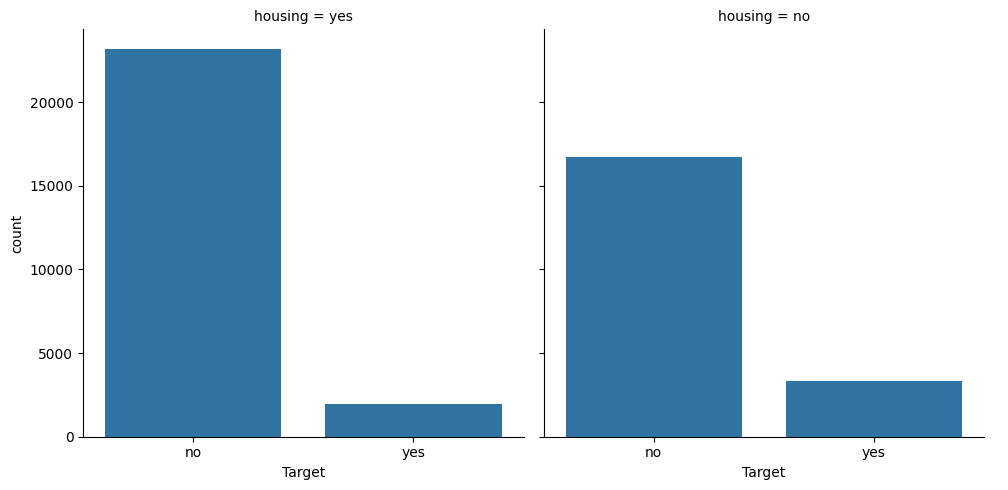

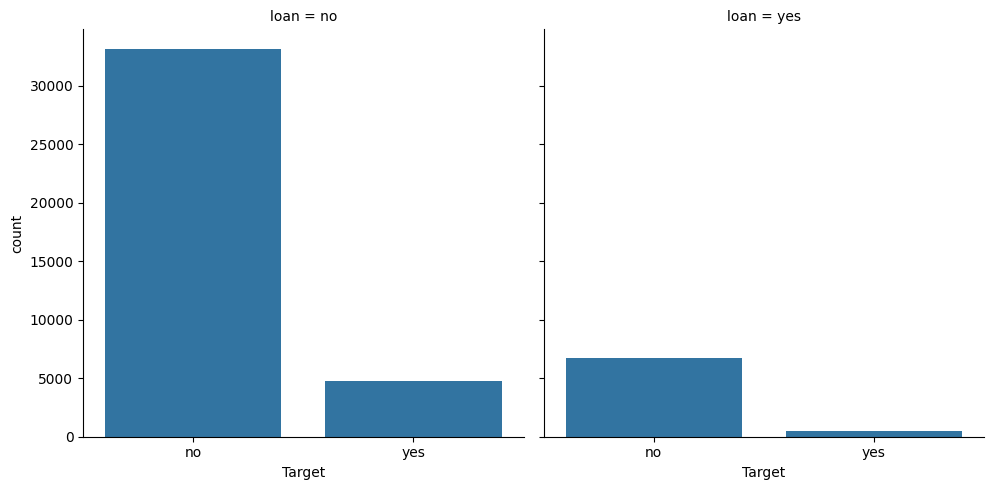

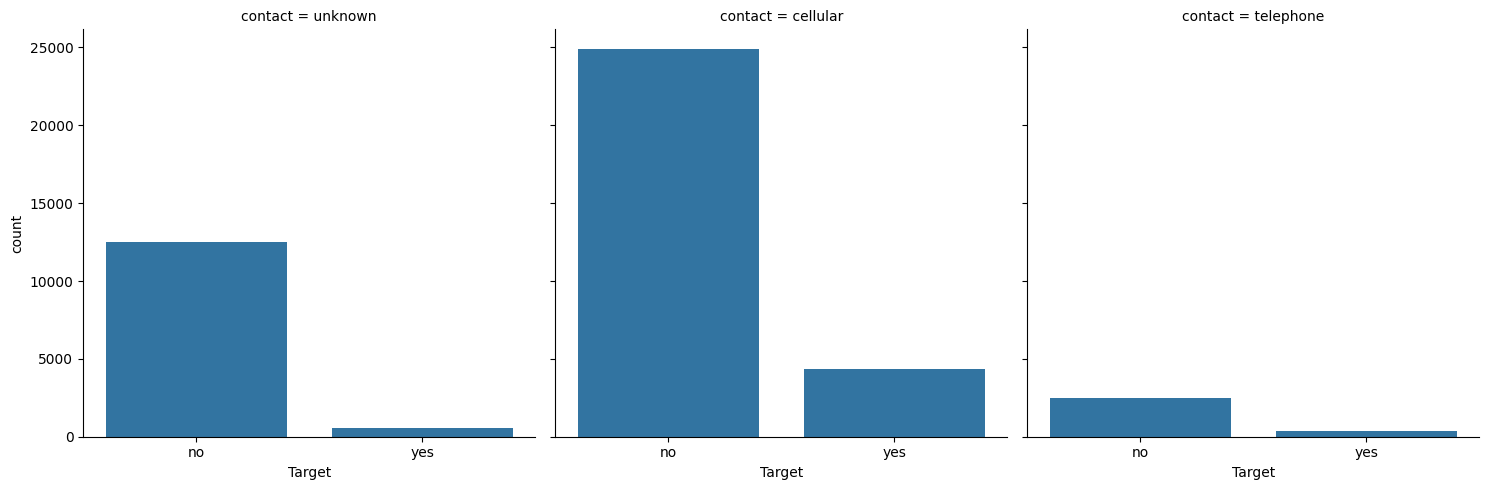

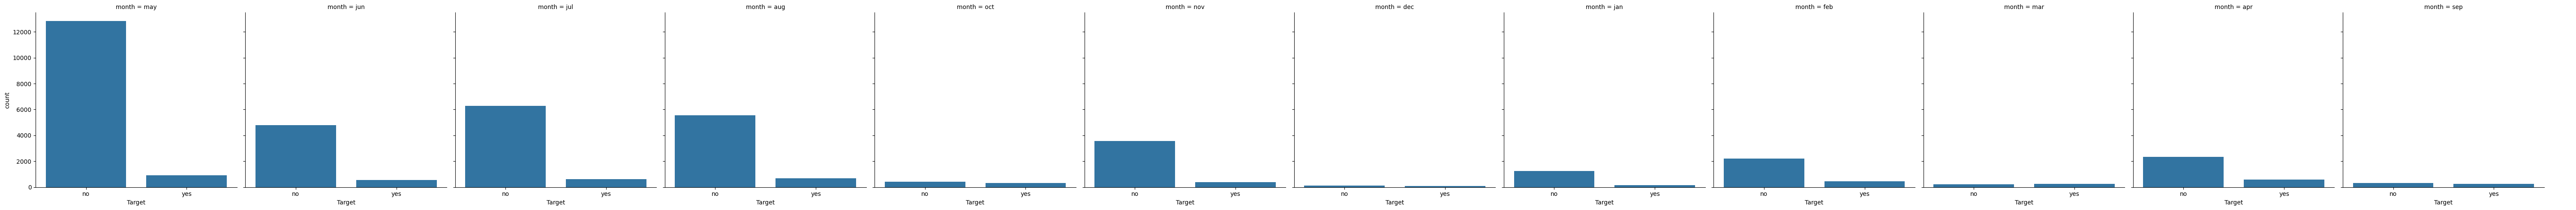

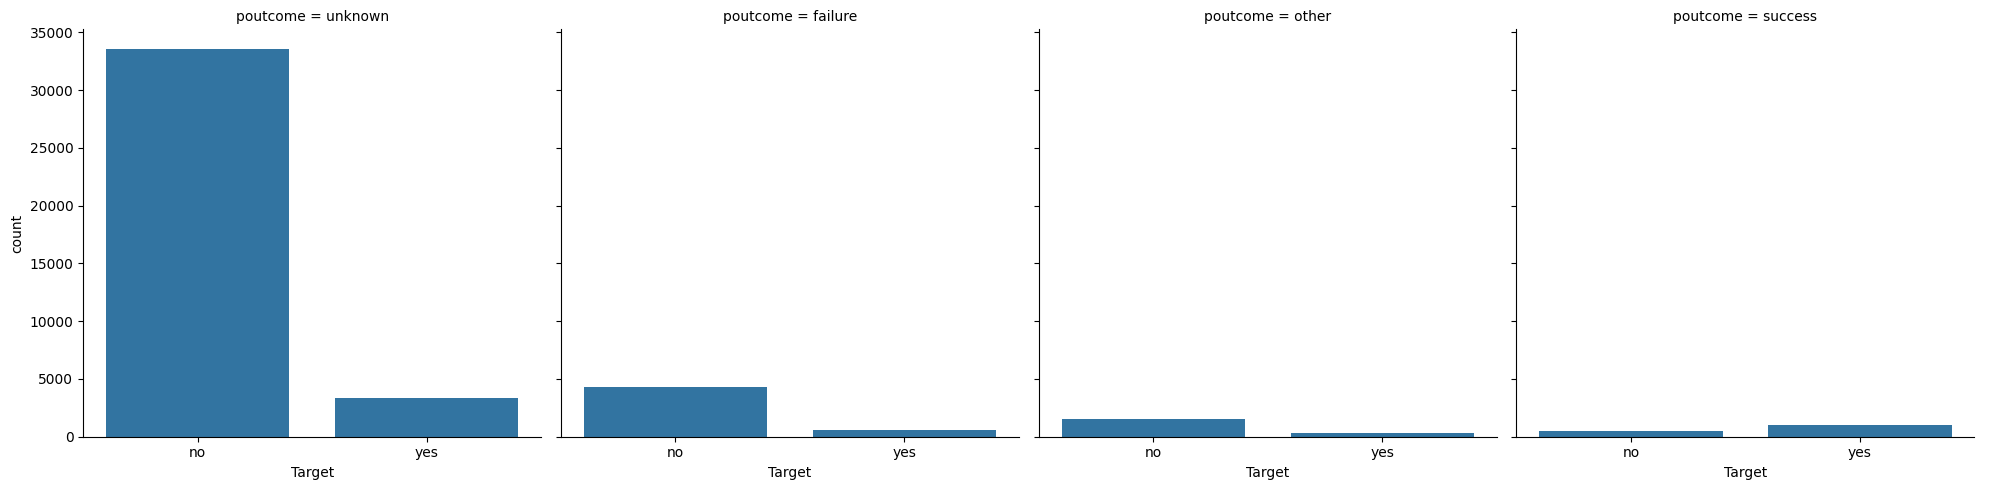

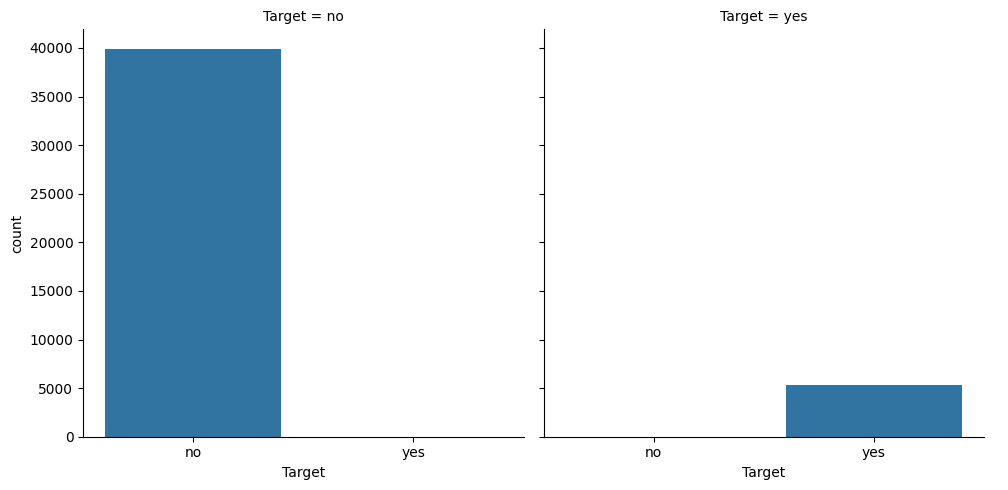

In [ ]:
# lets examine the distribution of the targe tvariable w respect to the categorical features
for feature in cat_features:
    sns.catplot(x='Target', col=feature, kind='count', data=df)
plt.show()

In [ ]:
# now lets look at the numerical data

In [ ]:
num_features = df.select_dtypes(include=['int']).columns.tolist()

In [ ]:
for feature in num_features:
    print('Feature {} | Category Numbers {}'.format(feature, len(df[feature].unique())))

Feature age | Category Numbers 77
Feature balance | Category Numbers 7168
Feature day | Category Numbers 31
Feature campaign | Category Numbers 48
Feature pdays | Category Numbers 559
Feature previous | Category Numbers 41


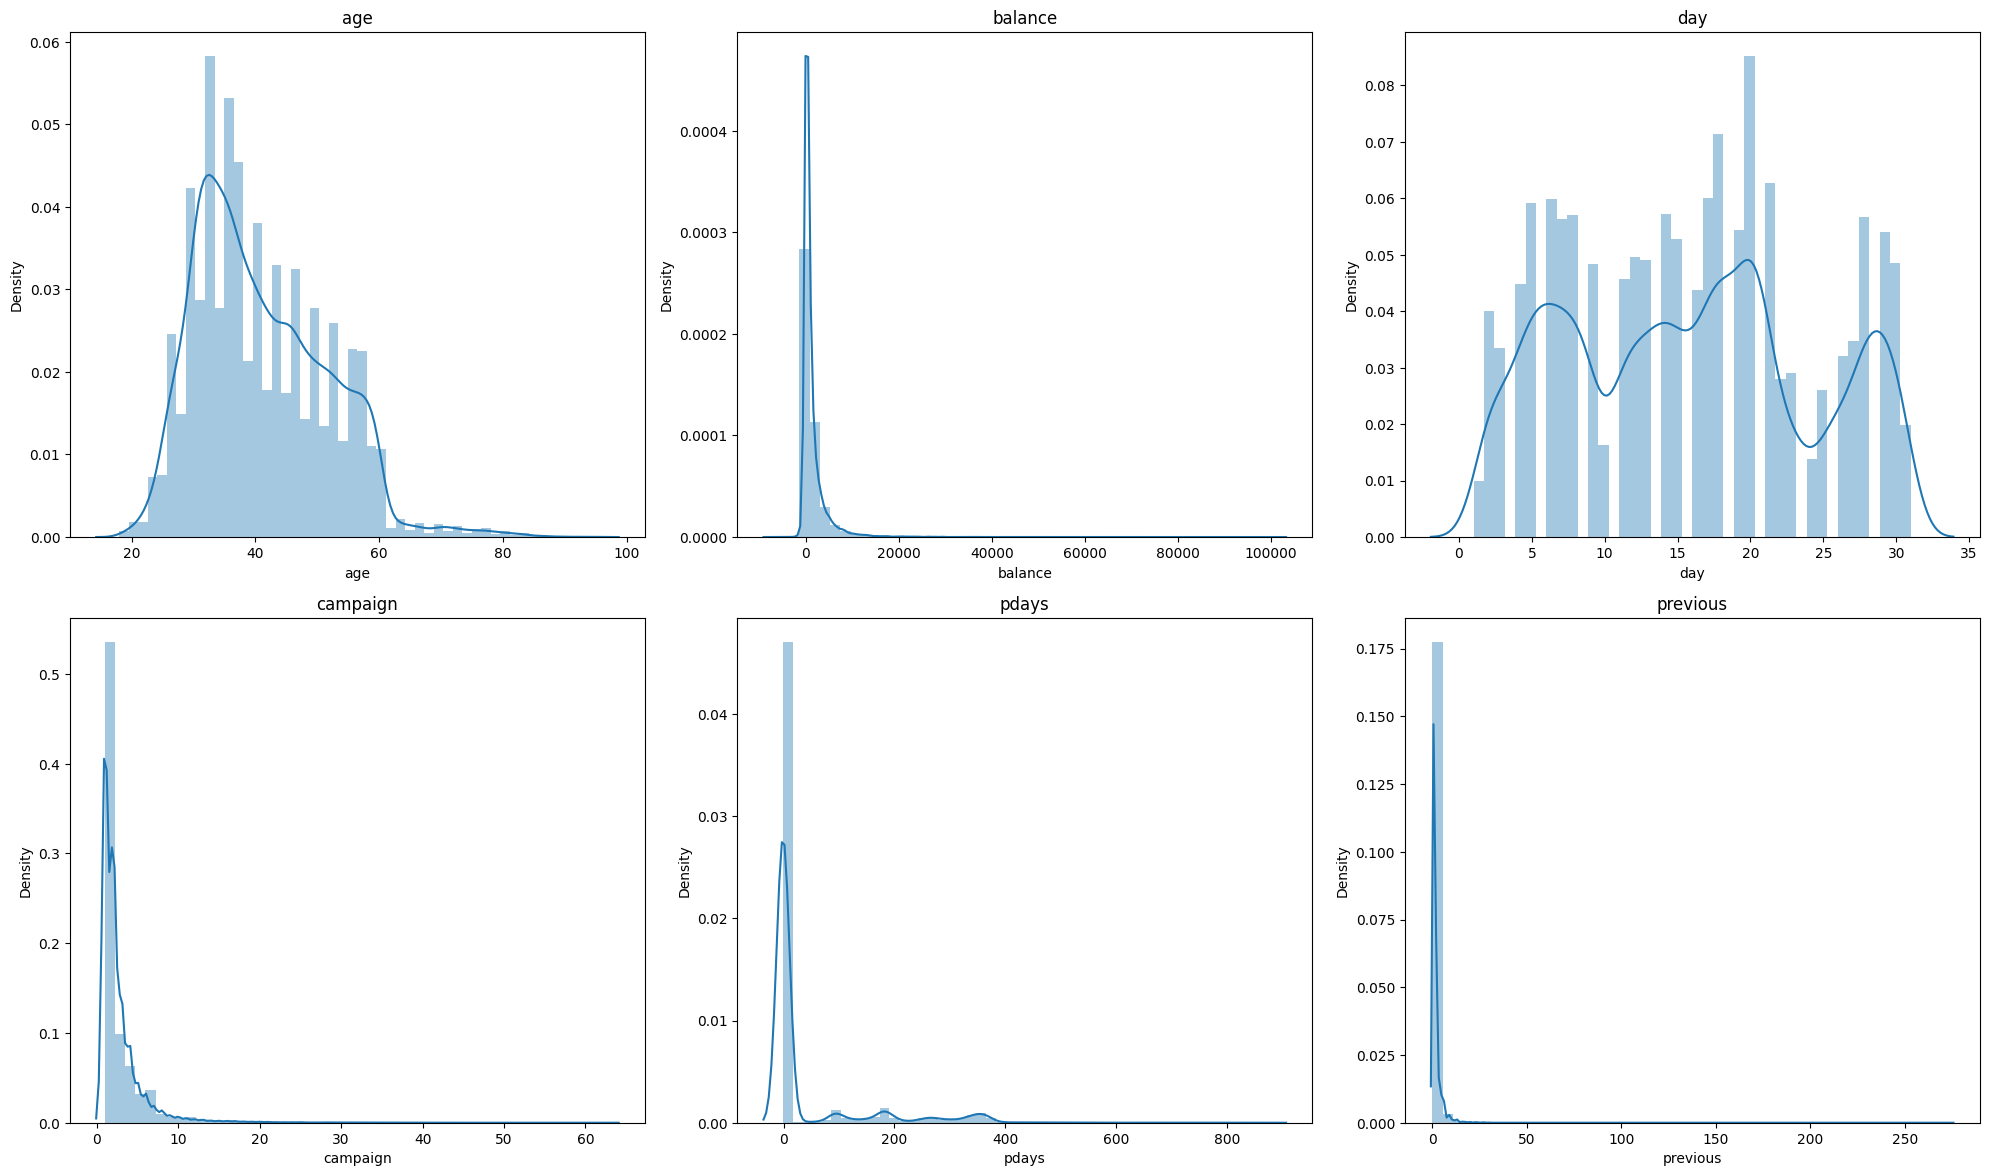

In [ ]:
# lets explore the distribution of continous features
plt.figure(figsize=(20, 70))
for i, feature in enumerate(num_features):
    ax = plt.subplot(12, 3, i+1)
    sns.distplot(df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

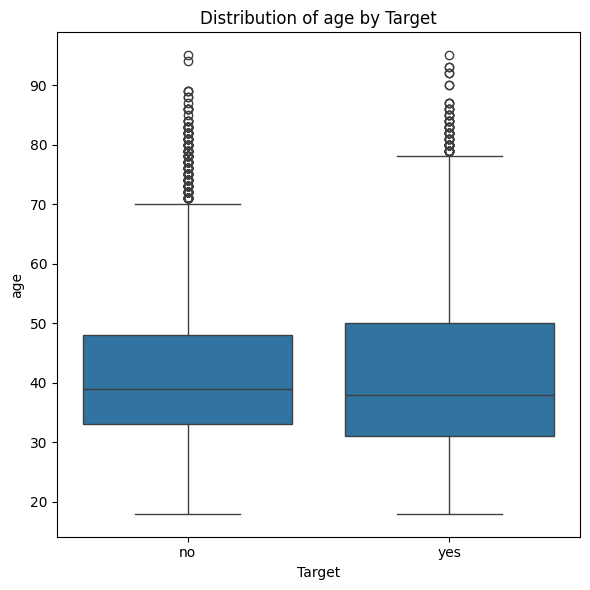

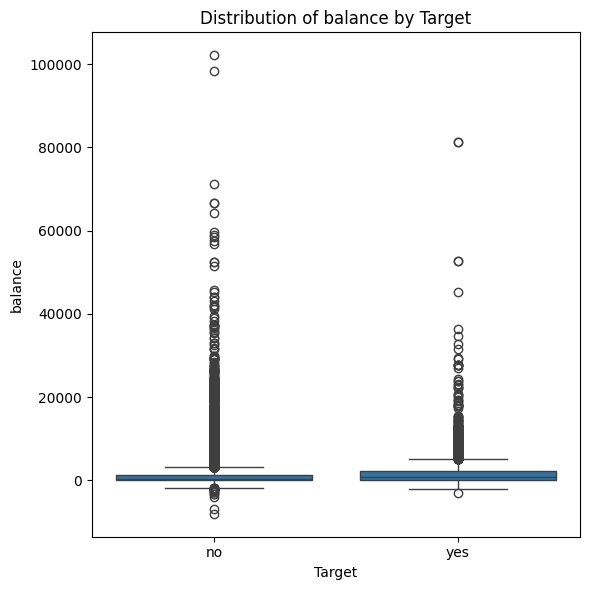

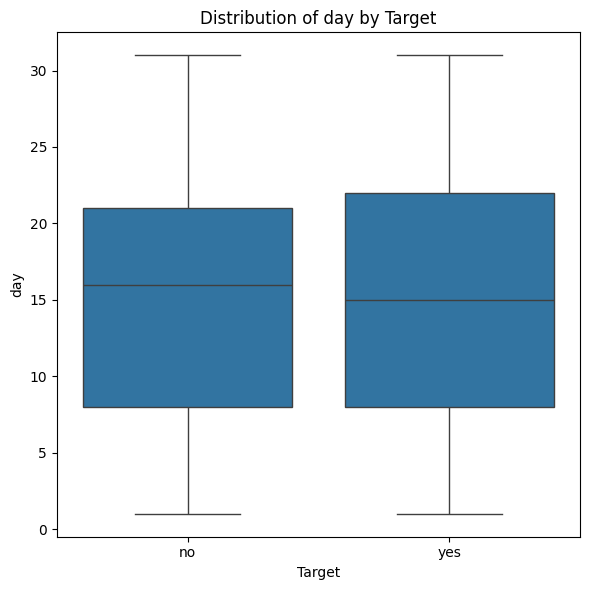

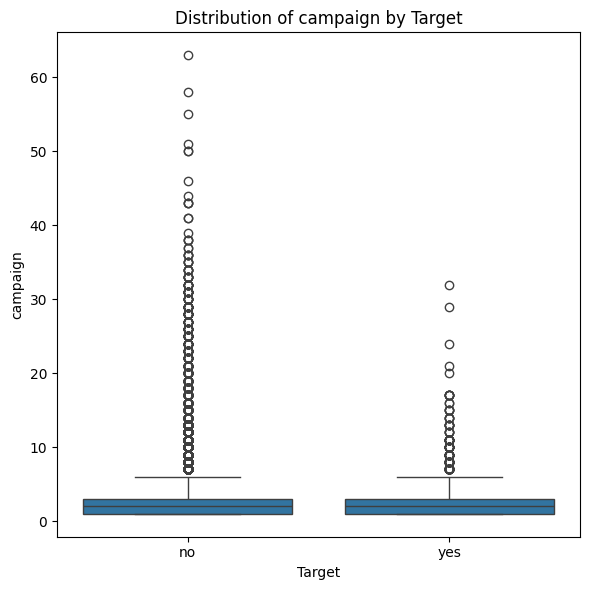

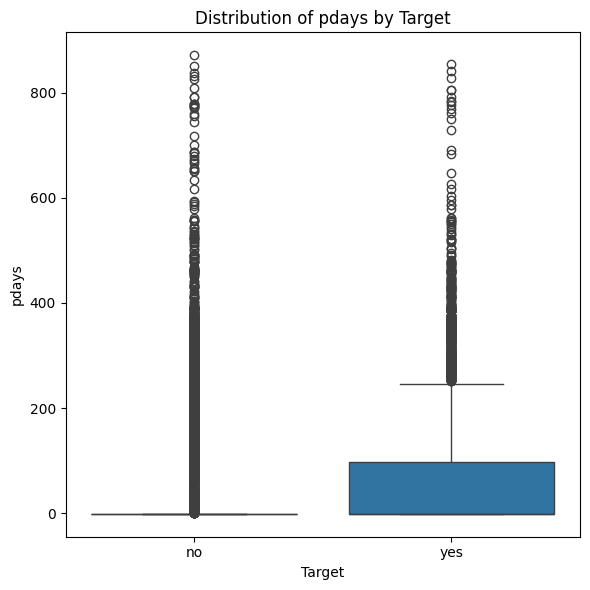

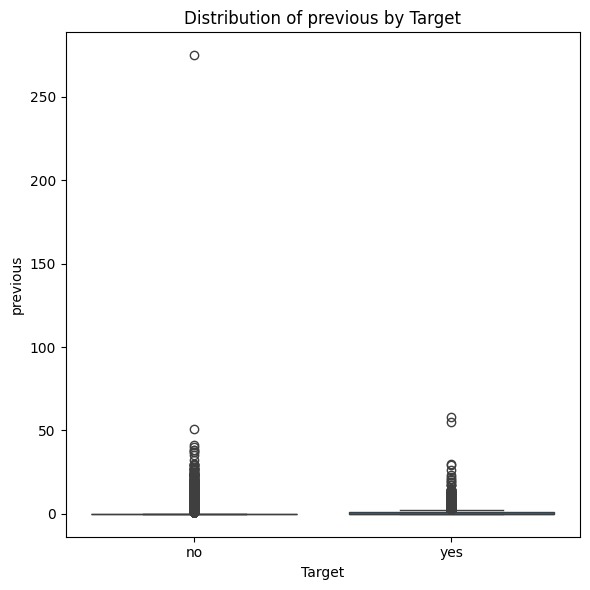

In [ ]:
# now lets see the distribution of the targe tvariable w respect to the numerical features
for feature in num_features:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='Target', y=feature, data=df)
    plt.xlabel('Target')
    plt.ylabel(feature)
    plotnumber+=1
    plt.title(f'Distribution of {feature} by Target')
    plt.tight_layout()
    plt.show()

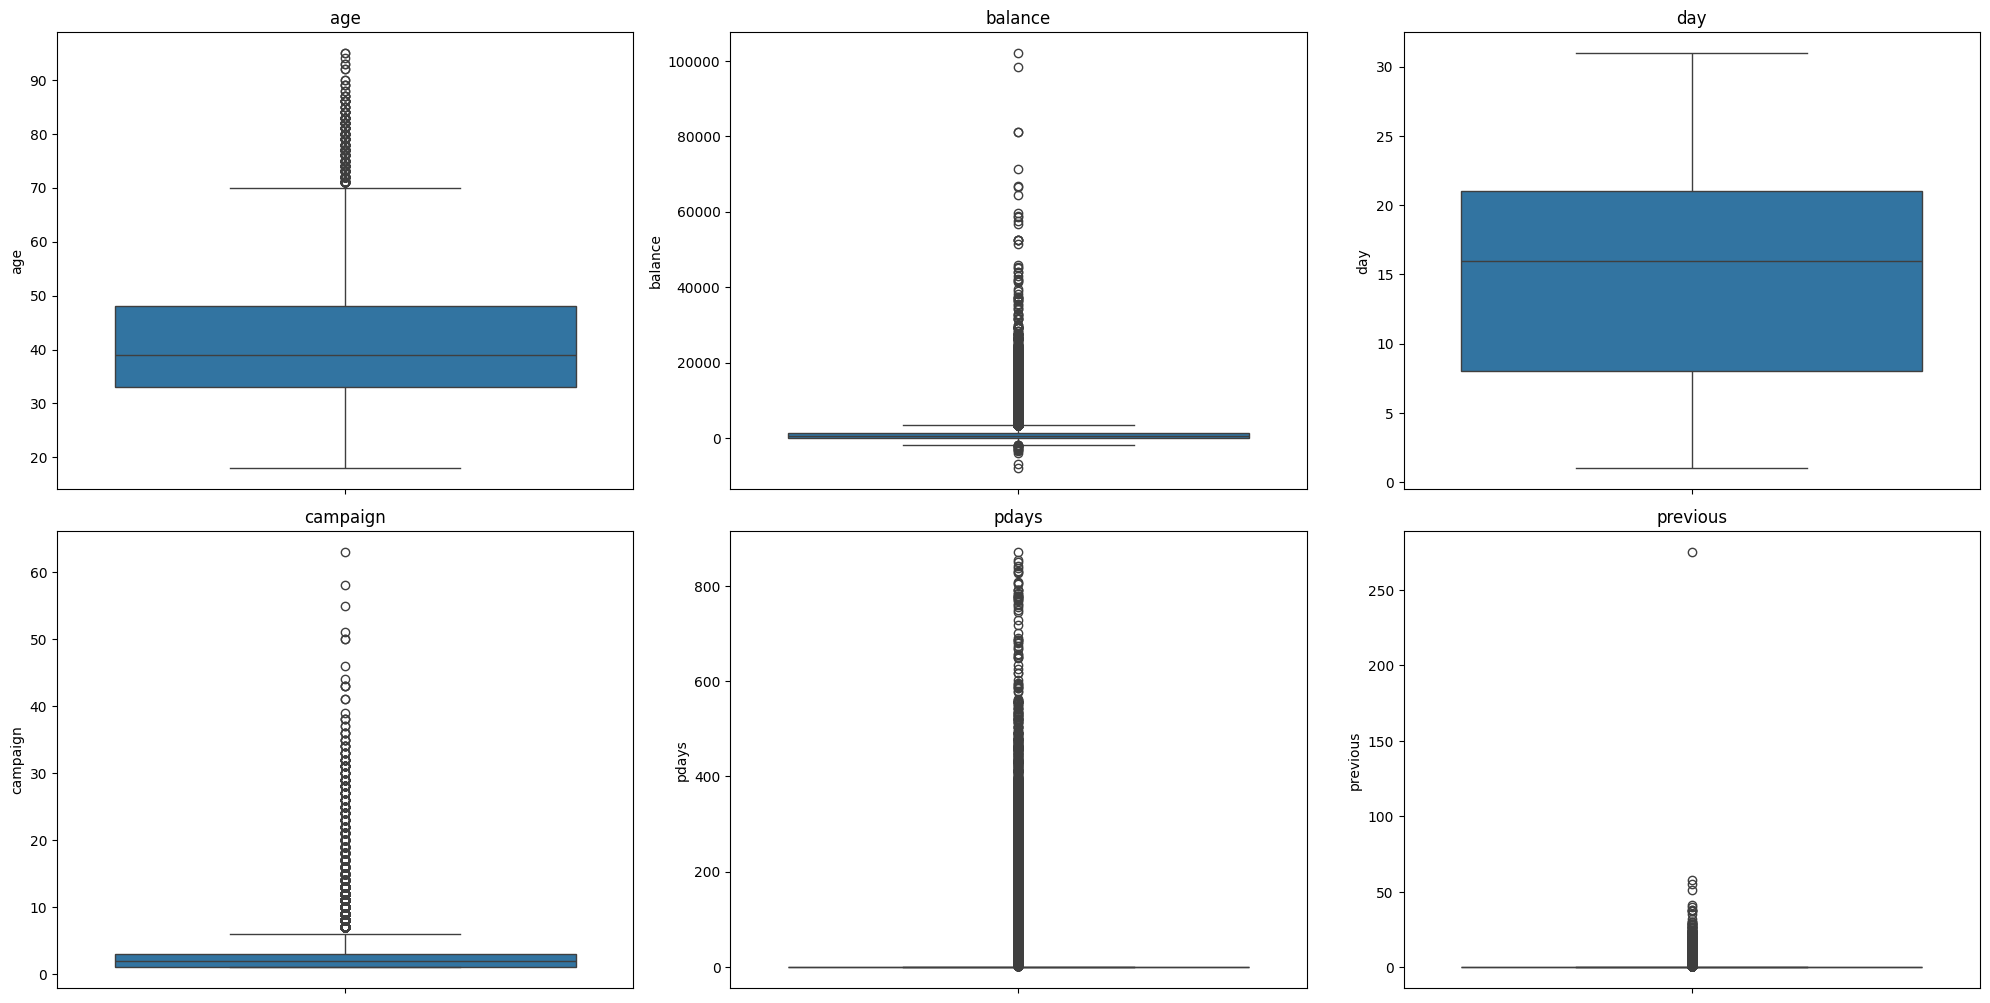

In [ ]:
# lets identify any outliers in the numerical data via boxplots
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
for feature in num_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(y=df[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plotnumber += 1
plt.tight_layout()
plt.show()

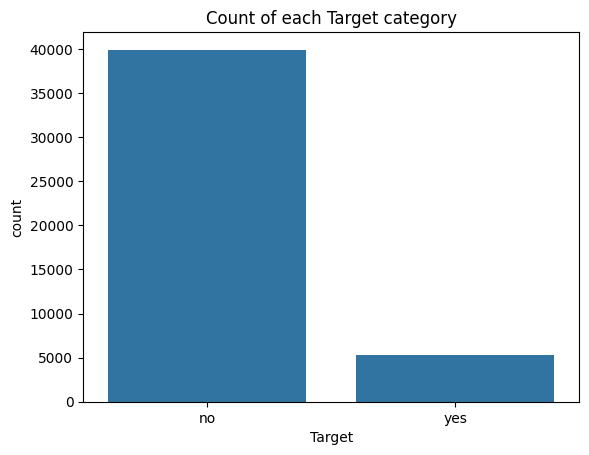

Target
no     39922
yes     5289
Name: count, dtype: int64


In [ ]:
# lets see if the data is balanced based on the target variable
sns.countplot(x='Target', data=df)
plt.title('Count of each Target category')
plt.show()
print(df['Target'].value_counts())

In [ ]:
# there is definately an imbalance w the target variable

In [ ]:
# lets move onto feature selection & make a new df for further use
df2= df.copy()

In [ ]:
# initialzie the encoder for the categorical features
encoder = LabelEncoder()

In [ ]:
# encode cat features
for feature in cat_features:
    df2[feature] = encoder.fit_transform(df2[feature])

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3,0


In [ ]:
# now lets calculate the information gain to find the best split
X= df2.drop('Target', axis=1)
y= df2['Target']

In [ ]:
# by using mutual_info_classif the entropy  calculation prior to the info gain calculation is automatically handled
# so we can move on to calculating the ID3
info_gain = mutual_info_classif(X, y)

In [ ]:
# create df to associate feature names with their info gain scores
feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information_Gain': info_gain})

# rank the features
feature_info_gain = feature_info_gain.sort_values(by='Information_Gain', ascending=False)

In [ ]:
print("Feature Ranking (Information Gain):")
print(feature_info_gain)

Feature Ranking (Information Gain):
      Feature  Information_Gain
14   poutcome          0.035248
12      pdays          0.025302
10      month          0.023137
5     balance          0.022541
6     housing          0.015886
8     contact          0.015336
13   previous          0.014512
0         age          0.013476
1         job          0.006686
11   campaign          0.006067
3   education          0.005370
2     marital          0.004433
7        loan          0.003029
9         day          0.001786
4     default          0.000000


In [ ]:
# above we can see which features have the highest information gain for our decision tree

In [ ]:
# selecting the features w the highest info gain
selected_features = ['poutcome', 'pdays', 'month']
X = df2[selected_features]
y = df2['Target']

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2 , random_state = 1000)

In [ ]:
# create and train the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=20, min_samples_leaf=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3,
                       random_state=100)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[7843  119]
 [ 874  207]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7962
           1       0.63      0.19      0.29      1081

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[7799  153]
 [ 867  224]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.8872055733716687


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
bag_model = BaggingClassifier(
    DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5),
    n_estimators=100,
    random_state=100
)

In [ ]:
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

In [ ]:
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print(f"Random Forest Accuracy: {accuracy_bag}")

Random Forest Accuracy: 0.8921817980758597


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# first lets create a random forest classifier
# we can balance the weights here too
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=5,
    random_state=100,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=5, random_state=100)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8507132588742674


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# lets try boosting too
b_model = AdaBoostClassifier(
    DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5),
    n_estimators=100,
    random_state=100
)
b_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_leaf=5),
                   n_estimators=100, random_state=100)

In [ ]:
y_pred_b = b_model.predict(X_test)

In [ ]:
accuracy_b = accuracy_score(y_test, y_pred_b)
print(f"AdaBoost Accuracy: {accuracy_b}")

AdaBoost Accuracy: 0.8912971359062258


In [ ]:
# lets evaluate all the models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# bagging classifier
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

[[7846  106]
 [ 869  222]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.68      0.20      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [ ]:
# boosting
print(confusion_matrix(y_test, y_pred_b))
print(classification_report(y_test, y_pred_b))

[[7838  114]
 [ 869  222]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.66      0.20      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [ ]:
# random forest
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[7208  744]
 [ 606  485]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7952
           1       0.39      0.44      0.42      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.68      0.67      9043
weighted avg       0.86      0.85      0.85      9043



In [ ]:
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# initialize the models with default parameters
model_1 = knn_model
model_2 = rf_model
model_3 = bag_model
model_4 = b_model

In [ ]:
final_model = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('rf', rf_model),
        ('bag', bag_model),
        ('boost', b_model)
    ],
    voting='soft'
)

In [ ]:
final_model.fit(x_train_smote, y_train_smote)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=10,
                                                     min_samples_leaf=5,
                                                     random_state=100)),
                             ('bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                 max_depth=10,
                                                                                 min_samples_leaf=5),
                                                n_estimators=100,
                                                random_state=100)),
                             ('boost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=10,
                                                                                  min_samples_leaf=5),
                                                 n_estimators=100,
                                                 random_state=100))],
                 voting='soft')

In [ ]:
pred_final = final_model.predict(X_test)

In [ ]:
score = accuracy_score(y_test, pred_final)
print(f"Accuracy Score: {score:.4f}")

Accuracy Score: 0.8505
